Курсовая работа по дисциплине "Операционализация моделей машинного обучения (Mlops)" 5 семестр

Цель: Создание MLOps-пайплайна для предсказания тональности отзывов о железнодорожных перевозках

Задачи: 
1) Парсинг данных из групп в социальных сетях 
2) Практическое применение алгоритмов анализа текстовых данных  
3) Составление отчёта о проделанной работе 
4) Защита работы 

In [1]:
# Для работы с таблицами
import pandas as pd
import numpy as np

# Для VK
from vk_api import VkApi

import re

from tqdm.auto import tqdm

d:\Загрузки\Петуны\Course_Work_MLops_5_semester\mlops-venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


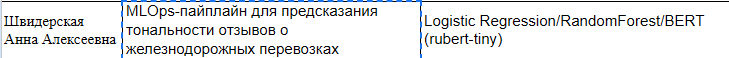

## Парсинг вконтакте


In [2]:
# access_token, полученный из адресной строки
token='vk1.a.xo7XZNad2i4OVf6RwUrDjlBNgeMdwGOHZcR-1ceTw0fNh_EsqlC7ayriui4K79jiK5pQsjL-o-H-4ZT1dV7V7VJHPd6Ep1wcr-I9sWY0WKTKr0BonLEt2nakGuJjUSdra_rr8GsvFEyfL_QvPyzy2bpSveaq1UrCd-Cyl9Vko56nUb4g34LO7eqivzGVHTMpEVByyHQguqq0J4fjFsIWMQ'
# РЖД группа
group_id='-38981315'

Парсить мне нужно только тексты постов, буду использовать группу **Российские железные дороги (ОАО "РЖД")** в качестве источника.

In [3]:
# Функция для парсинга постов со стены выбранной группы ВК через group_id
def main(offset: int, token: str, group_id: str):
    vk = VkApi(token=token) # авторизация через токен 
    api = vk.get_api()
    posts = api.wall.get(owner_id = group_id, offset = offset, count=100)['items']
    posts_strings = [post['text'] for post in posts]
    return posts_strings

In [4]:
combo_list_posts = []

for i in range(0, 9000, 100):
    try:
        rzd_posts = main(offset = i, token = token, group_id = '-38981315')
        combo_list_posts.extend(rzd_posts)
    except:
        print('Постов больше нет на смещении: ', i)

In [5]:
len(combo_list_posts)

8676

Текста постов:

In [6]:
for i in combo_list_posts:
    print(i)
    print('-' * 40)

Где-то в Челябинской области — суровая красота уральских железных дорог
----------------------------------------
Отличный повод запланировать зимнее приключение — 11 декабря празднуется Международный день гор. Это идеальное время, чтобы открыть для себя новые трассы! 

Показываем, с каких вокзалов проще всего попасть на легендарные курорты страны - https://vk.cc/cSdt4d
----------------------------------------
С 1 декабря у всех наших пассажиров появился новый повод с нетерпением ждать посадки в поезд — мы запускаем зимнее меню! Оно будет действовать до 28 февраля в вагонах повышенной комфортности. 
 
🧀 В купейных вагонах можно попробовать уютные блюда вроде запечённых сырников с овсянкой и джемом или пастушьего пирога. 
 
🥞 В вагонах СВ поездов с новой концепцией питания появятся, например, гречневые блины с курицей, а для детей — сырники, запечённые с персиком. 
 
🍖 В вагонах "Люкс" мы предложим паштет из птицы с малиновым соусом, утиную грудку в медовой глазури и стейк из лосося с фи

### Сохраняем тексты постов в датасет Post.csv

In [7]:
# Добавьте функцию для сохранения данных в csv, иначе потеряете их
my_text_1 = pd.DataFrame(data = combo_list_posts, columns=["Text"])
my_text_1['goal'] = 1

In [8]:
# Сохранени в CSV
my_text_1.to_csv('Posts.csv', sep=';', encoding='utf-8', index=False)
my_text_1.tail()

Text  goal
8671  Старший вице-президент ОАО "РЖД" Валентин Гапа...     1
8672                                                        1
8673  Глава ОАО «РЖД» Владимир Якунин говорит о том,...     1
8674  Внимание пассажирам! Определен график движения...     1
8675  Добро пожаловать на официальную страницу ОАО "...     1

## ЕДА

In [3]:
df = pd.read_csv('Posts.csv', sep=';', encoding='utf-8')

In [4]:
df = df.drop(columns=['goal'])

In [5]:
df.head(5)

Text
0  Где-то в Челябинской области — суровая красота...
1  Отличный повод запланировать зимнее приключени...
2  С 1 декабря у всех наших пассажиров появился н...
3  Уже почти год между Москвой и Санкт-Петербурго...
4                                                NaN

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8676 entries, 0 to 8675
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    7447 non-null   object
dtypes: object(1)
memory usage: 67.9+ KB


In [7]:
# Заменяем пустые строки, состоящие из пробельных символов на Nan знаечния
df = df.replace(r'^\s*$', np.nan, regex=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8676 entries, 0 to 8675
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    7447 non-null   object
dtypes: object(1)
memory usage: 67.9+ KB


In [9]:
# Удаляем строки с пустыми значениями
df = df.dropna()

df.shape

(7447, 1)

In [10]:
# Удаляем дубликаты

df = df.drop_duplicates()

df.shape

(7395, 1)

#### Из-за отсутствия размеченной обучающей выборки была использована предобученная модель анализа тональности RuBERT для формирования целевой переменной

## Предварительная обработка текстовых данных (Data preprocessing)

#### Виды упомнинаний:

1. 🥇 Катарина Андреевна ([id51469957|@katarinushka])

2. 🏆Билеты туда-обратно на две персоны получает [id576145788|Игорь Коваленко] и его мечта о железнодорожном вояже до Владивостока. 

3. Также для участия в конкурсе подпишитесь на сообщества [club38981315|Российских железных дорог] и [club177946067|поезда "Сапсан"].

In [11]:
def preprocess_text(text):
    # 1. Приведение текста к нижнему регистру
    text = text.lower()

    # 2. Удаление ссылок
    text = re.sub(r'http\S+|www\.\S+', ' ', text)

    # 3. Удаление хэштегов
    text = re.sub(r'#\w+', ' ', text)

    # 4. Удаление упоминаний
    text = re.sub(r'(id\d+|@\w+|club\d+)', ' ', text)

    # 5. Удаление всего, кроме букв, цифр, пробелов и ! ? .
    text = re.sub(r"[^a-zа-я0-9\s!?\.]", " ", text)
    
    # 6. Удаление лишних пробелов
    text = re.sub(r"\s+", " ", text).strip()
    
    return text

In [12]:
if 'Text' in df.columns:
    tqdm.pandas()
    df['processed_text'] = df['Text'].progress_apply(preprocess_text)
    print("Предобработка текста завершена.")
    display(df.head())

  0%|          | 0/7395 [00:00<?, ?it/s]

100%|██████████| 7395/7395 [00:00<00:00, 38989.49it/s]

Предобработка текста завершена.


Text  \
0  Где-то в Челябинской области — суровая красота...   
1  Отличный повод запланировать зимнее приключени...   
2  С 1 декабря у всех наших пассажиров появился н...   
3  Уже почти год между Москвой и Санкт-Петербурго...   
5  В Амурской области есть станция, которую уважи...   

                                      processed_text  
0  где то в челябинской области суровая красота у...  
1  отличный повод запланировать зимнее приключени...  
2  с 1 декабря у всех наших пассажиров появился н...  
3  уже почти год между москвой и санкт петербурго...  
5  в амурской области есть станция которую уважит...

In [13]:
# Удаление текстов длиной короче 3 символов
df = df[df['processed_text'].str.split().str.len() >= 3]

In [26]:
# Обработка аномально длинных постов
df = df[df["processed_text"].str.split().str.len() < 500]

## Разметка данных 

Для разметки данных была выбрана модель RuBERT для тональности:

blanchefort/rubert-base-cased-sentiment

Причины:
1. обучена именно на русскоязычных отзывах и сообщениях
2. поддерживает 3 класса: positive / neutral / negative
3. совместима с HuggingFace

In [17]:
from transformers import pipeline

# Формирования пайплайна
sentiment_model = pipeline(
    task="sentiment-analysis",
    model="blanchefort/rubert-base-cased-sentiment",
    tokenizer="blanchefort/rubert-base-cased-sentiment"
)

In [27]:
from tqdm import tqdm

texts = df["processed_text"].astype(str).tolist()

results = []
batch_size = 16

for i in tqdm(range(0, len(texts), batch_size)):
    batch = texts[i:i + batch_size]
    preds = sentiment_model(batch)
    results.extend(preds)

df["sentiment"] = [r["label"] for r in results]
df["sentiment_score"] = [r["score"] for r in results]


100%|██████████| 455/455 [12:26<00:00,  1.64s/it]


In [29]:
df.to_csv('preprocessed_ds.csv', sep=';', encoding='utf-8', index=False)

In [30]:
df

Text  \
0     Где-то в Челябинской области — суровая красота...   
1     Отличный повод запланировать зимнее приключени...   
2     С 1 декабря у всех наших пассажиров появился н...   
3     Уже почти год между Москвой и Санкт-Петербурго...   
5     В Амурской области есть станция, которую уважи...   
...                                                 ...   
8670  21 мая в Саратовском регионе Приволжской желез...   
8671  Старший вице-президент ОАО "РЖД" Валентин Гапа...   
8673  Глава ОАО «РЖД» Владимир Якунин говорит о том,...   
8674  Внимание пассажирам! Определен график движения...   
8675  Добро пожаловать на официальную страницу ОАО "...   

                                         processed_text sentiment  \
0     где то в челябинской области суровая красота у...   NEUTRAL   
1     отличный повод запланировать зимнее приключени...  POSITIVE   
2     с 1 декабря у всех наших пассажиров появился н...  POSITIVE   
3     уже почти год между москвой и санкт петербурго...  POSITIVE   
5     в амурской области есть станция которую уважит...   NEUTRAL   
...                                                 ...       ...   
8670  21 мая в саратовском регионе приволжской желез...  POSITIVE   
8671  старший вице президент оао ржд валентин гапано...   NEUTRAL   
8673  глава оао ржд владимир якунин говорит о том с ...  NEGATIVE   
8674  внимание пассажирам! определен график движения...   NEUTRAL   
8675  добро пожаловать на официальную страницу оао р...   NEUTRAL   

      sentiment_score  
0            0.826016  
1            0.961095  
2            0.955874  
3            0.673519  
5            0.809933  
...               ...  
8670         0.949140  
8671         0.811200  
8673         0.751491  
8674         0.819514  
8675         0.820764  

[7272 rows x 4 columns]

## Работа

In [2]:
df = pd.read_csv('preprocessed_ds.csv', sep=';', encoding='utf-8')

In [ ]:
df['sentiment'].value_counts()

sentiment
NEUTRAL     4674
POSITIVE    1769
NEGATIVE     829
Name: count, dtype: int64

### Разбиение на train / test

In [24]:
from sklearn.model_selection import train_test_split

X = df['processed_text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [31]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

import os
import joblib


#   Эксперимент 1 Logistic Regression   #
with mlflow.start_run(run_name='LogReg_baseline'):
    vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    
    model = LogisticRegression(
        max_iter=1000, 
        class_weight='balanced',
        random_state=42
    )
    model.fit(X_train_vec, y_train)

    y_pred = model.predict(X_test_vec)
    
    # mlflow
    mlflow.log_param("model", "LogisticRegression")
    mlflow.log_param("ngram_range", "(1,2)")
    mlflow.log_param("max_features", 10000)
    
    mlflow.log_metric("f1_macro", f1_score(y_test, y_pred, average="macro"))
    mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred))

    # Сохранение артефактов для FastApi и Docker
    os.makedirs("artifacts", exist_ok=True)
    joblib.dump(model, "artifacts/model.pkl")
    joblib.dump(vectorizer, "artifacts/vectorizer.pkl")

    mlflow.log_artifacts("artifacts")
    

#   Эксперимент 2 Random Forest     #
with mlflow.start_run(run_name="RandomForest"):
    vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=10000)
    X_train_vec = vectorizer.fit_transform(X_train).toarray()
    X_test_vec = vectorizer.transform(X_test).toarray()

    model = RandomForestClassifier(
        n_estimators=200,
        max_depth=20,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    )

    model.fit(X_train_vec, y_train)
    preds = model.predict(X_test_vec)

    mlflow.log_param("model", "RandomForest")
    mlflow.log_param("n_estimators", 200)

    mlflow.log_metric("f1_macro", f1_score(y_test, preds, average="macro"))
    mlflow.log_metric("accuracy", accuracy_score(y_test, preds))
    
    
#   Эксперимент 3 Logistic Regression №2    #
with mlflow.start_run(run_name='LogReg_baseline2'):
    vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=15000)
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    
    model = LogisticRegression(max_iter=1000, class_weight='balanced')
    model.fit(X_train_vec, y_train)

    y_pred = model.predict(X_test_vec)
    
    # mlflow
    mlflow.log_param("model", "LogisticRegression")
    mlflow.log_param("ngram_range", "(1,3)")
    mlflow.log_param("max_features", 15000)
    
    mlflow.log_metric("f1_macro", f1_score(y_test, y_pred, average="macro"))
    mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred))


### TF-IDF (Feauture engineering)

In [ ]:
vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),
    max_features=10000
)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

### Обучение первой модели Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    NEGATIVE       0.30      0.39      0.34       166
     NEUTRAL       0.77      0.70      0.73       935
    POSITIVE       0.55      0.62      0.59       354

    accuracy                           0.64      1455
   macro avg       0.54      0.57      0.55      1455
weighted avg       0.67      0.64      0.65      1455



In [22]:
X_test_vec = vectorizer.transform(['Очень понравилась поездка'])
probs = model.predict_proba(X_test_vec)
print(probs)

[[0.24768872 0.32874018 0.4235711 ]]


### Сохранение артефактов для FastApi и Docker

In [12]:
import joblib

joblib.dump(model, "artifacts/model_lr.pkl")
joblib.dump(vectorizer, "artifacts/tfidf.pkl")

['artifacts/tfidf.pkl']

### Обучение второй модели Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_vec.toarray(), y_train)
rf_pred = rf.predict(X_test_vec.toarray())

print("Random Forest")
print(classification_report(y_test, rf_pred))

Random Forest
              precision    recall  f1-score   support

    NEGATIVE       0.33      0.27      0.30       166
     NEUTRAL       0.73      0.81      0.77       935
    POSITIVE       0.59      0.46      0.52       354

    accuracy                           0.67      1455
   macro avg       0.55      0.51      0.53      1455
weighted avg       0.65      0.67      0.65      1455



### Модель 3 LR с другими гиперпараметрами

In [16]:
vectorizer_3 = TfidfVectorizer(
    ngram_range=(1, 3),
    max_features=15000
)

X_train_vec_3 = vectorizer_3.fit_transform(X_train)
X_test_vec_3 = vectorizer_3.transform(X_test)

lr_3 = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

lr_3.fit(X_train_vec_3, y_train)
lr_3_pred = lr_3.predict(X_test_vec_3)

print("Logistic Regression (1–3 grams)")
print(classification_report(y_test, lr_3_pred))

Logistic Regression (1–3 grams)
              precision    recall  f1-score   support

    NEGATIVE       0.30      0.39      0.34       166
     NEUTRAL       0.77      0.70      0.73       935
    POSITIVE       0.55      0.62      0.59       354

    accuracy                           0.64      1455
   macro avg       0.54      0.57      0.55      1455
weighted avg       0.67      0.64      0.65      1455



## Описательная статистика

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

In [ ]:
prepr_df = pd.read_csv('preprocessed_ds.csv', sep=';', encoding='utf-8')

prepr_df = prepr_df.dropna()

In [ ]:
# Размер итогового датасета
prepr_df.shape

(7296, 3)

In [ ]:
prepr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7296 entries, 0 to 7394
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Text            7296 non-null   object
 1   goal            7296 non-null   int64 
 2   processed_text  7296 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.0+ KB


In [ ]:
prepr_df.head(5)

Text  goal  \
0  Где-то в Челябинской области — суровая красота...     1   
1  Отличный повод запланировать зимнее приключени...     1   
2  С 1 декабря у всех наших пассажиров появился н...     1   
3  Уже почти год между Москвой и Санкт-Петербурго...     1   
4  В Амурской области есть станция, которую уважи...     1   

                                      processed_text  
0  челябинский область суровый красота уральский ...  
1  отличный повод запланировать зимний приключени...  
2  декабрь пассажир появиться новый повод нетерпе...  
3  год москва санкт петербург курсировать обновит...  
4  амурский область станция уважительно называть ...

In [ ]:
# Смотрим топ-100 самыях частых слов

all_words = " ".join(prepr_df['processed_text']).split()
word_freq = Counter(all_words)

top_100_words = word_freq.most_common(100)

top_100_words
top_100_df = pd.DataFrame(top_100_words, columns=['word', 'frequency'])
top_100_df

word  frequency
0        вокзал       3083
1           год       2905
2         поезд       2632
3        дорога       1757
4      железный       1486
..          ...        ...
95        знать        225
96          всё        223
97      декабрь        221
98      площадь        219
99  специальный        218

[100 rows x 2 columns]

In [ ]:
# Дополнитеьные стоп слова
stop_words_plus = set(['сегодня', 'еще', 'ещё', 'именно', 'несколько', 'очень',
    'также', 'уже', 'недавно', 'сейчас',
    'много', 'мало', 'каждый', 'любой',
    'быть', 'стать', 'являться', 'мочь',
    'год', 'день', 'время', 'век', 'начало', 'первый',
    'каждый', 'весь', 'всё', 'несколько', 'тысяча',
    'самый', 'именно', 
    "стать", "мочь", "смочь", "быть", "работать", "получить", "сделать", "появиться", "находиться", "узнать", "знать", "увидеть", "рассказывать", "рассказать", "делиться", "открыть", "ждать",
    "нужно", 'напоминать',
    "ваш", "комментарий", "сообщение", "ответ", "сайт", "приложение", 
    "хороший", "интересный", "красивый", "удобный", "великий", "современный", "главный", 'подробный'
])

In [ ]:
len(stop_words_plus)

58

In [ ]:
from tqdm import tqdm
tqdm.pandas()
texts_as_lists = [] # Список всех слов в постах

# Дополнительный препроцессинг на основе анализа Топ-100 самых частых слов
def preprocess_text(text):
    words = text.split()
    filtered_lemmas = [lemma for lemma in words if lemma not in stop_words_plus]
    texts_as_lists.append(filtered_lemmas)

    return " ".join(filtered_lemmas)


if 'processed_text' in prepr_df.columns:
    prepr_df['processed_text'] = prepr_df['processed_text'].progress_apply(lambda x: preprocess_text(x))
    print("Предобработка текста завершена.")
    display(prepr_df.head())

100%|██████████| 7296/7296 [00:00<00:00, 86345.80it/s]

Предобработка текста завершена.


Text  goal  \
0  Где-то в Челябинской области — суровая красота...     1   
1  Отличный повод запланировать зимнее приключени...     1   
2  С 1 декабря у всех наших пассажиров появился н...     1   
3  Уже почти год между Москвой и Санкт-Петербурго...     1   
4  В Амурской области есть станция, которую уважи...     1   

                                      processed_text  
0  челябинский область суровый красота уральский ...  
1  отличный повод запланировать зимний приключени...  
2  декабрь пассажир новый повод нетерпение посадк...  
3  москва санкт петербург курсировать обновить дв...  
4  амурский область станция уважительно называть ...

In [ ]:
# Количество слов в обработанном тексте
prepr_df['text_length'] = prepr_df['processed_text'].apply(lambda x: len(str(x).split()))

In [ ]:
plt.style.use('default')

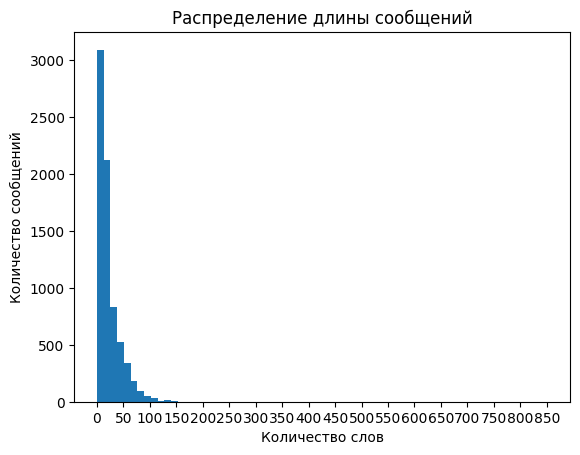

In [ ]:
# Гистограмма длин сообщений
plt.figure()
plt.hist(prepr_df['text_length'], bins=67)
plt.locator_params(axis='x', nbins=25)
plt.xlabel('Количество слов')
plt.ylabel('Количество сообщений')
plt.title('Распределение длины сообщений')
plt.show()

median = 15.0
q1 = 9.0
q3 = 29.0


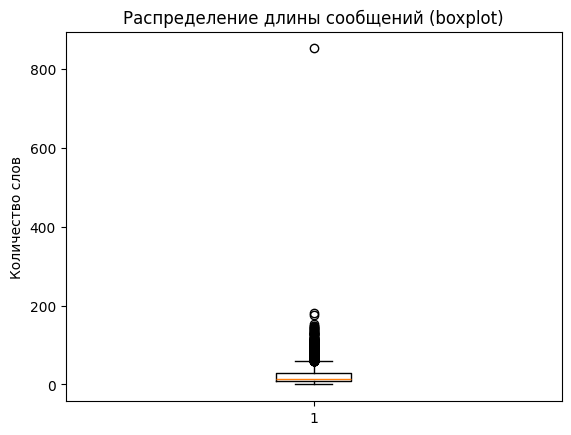

In [ ]:
plt.figure()
plt.boxplot(prepr_df['text_length'], vert=True)
plt.ylabel('Количество слов')
plt.title('Распределение длины сообщений (boxplot)')

median = prepr_df['text_length'].median()
q1 = prepr_df['text_length'].quantile(0.25)
q3 = prepr_df['text_length'].quantile(0.75)

print('median =', median)
print('q1 =', q1)
print('q3 =', q3)
plt.show()

In [ ]:
prepr_df = prepr_df[prepr_df['text_length'] >= 4]
prepr_df.shape

(6938, 4)

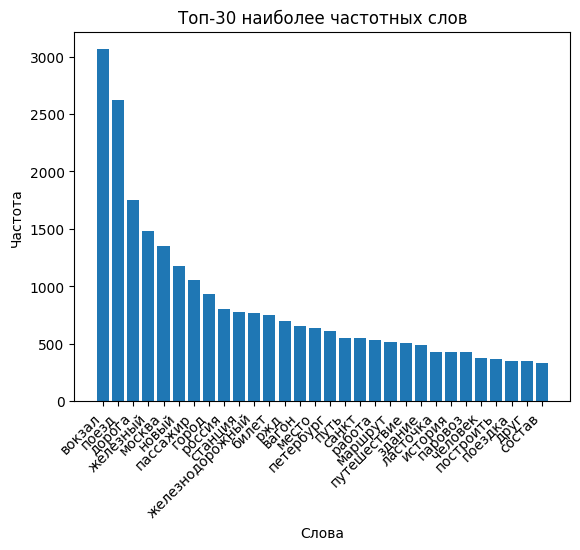

In [ ]:
# Получение списка всех слов
all_words = " ".join(prepr_df['processed_text']).split()

# Топ-20 самых частотных слов
word_freq = Counter(all_words)
top_words = word_freq.most_common(30)

words, counts = zip(*top_words)

plt.figure()
plt.bar(words, counts)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Слова')
plt.ylabel('Частота')
plt.title('Топ-30 наиболее частотных слов')
plt.show()

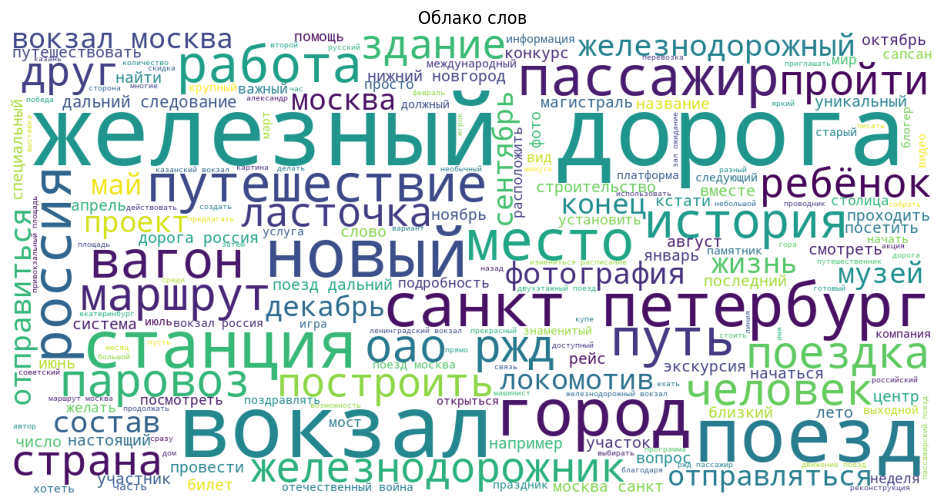

In [ ]:
# Облако слов
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white'
).generate(" ".join(all_words))

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Облако слов')
plt.show()

## Тематическое моделирование

Выбор пал на модели LDA и NMF, тк
1. Они созданы для выявления тематических направлений постов

2. Обрабатывают средние и длинные по длине текста от 50 до >100 слов, нежели BERTopic и эмбеддинги
3. Они лучше интерпретируются для отчета, их проще объяснять, нежели LSI, KMeans
4. Требуют не таких больших вычислительных ресурсов в отличии от BERTopic. Код можно запустить на любом пк
5. Идеальны для <<100 тысяч постов

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from gensim.models import LdaModel
from gensim.corpora import Dictionary

In [ ]:
# Векторизация текста

# Единый список стоп-слов
all_stop_words = set()
all_stop_words |= russian_stopwords
all_stop_words |= stop_words_plus
russian_stopwords_list = list(all_stop_words)

# Векторизация
count_vectorizer = CountVectorizer(max_features=1000, ngram_range=(1, 2), stop_words=russian_stopwords_list, max_df=0.9, min_df=2) # униграмму и биаграмму используем
dataset = count_vectorizer.fit_transform(prepr_df['processed_text']) # Разреженная матрица

### LDA из sklearn.decomposition

In [ ]:
# Задаём модель LDA для 10 тем
lda = LDA(n_components = 10,
         max_iter=50,
         n_jobs=-1,
         learning_method='batch',
         random_state=42)
lda.fit(dataset)

LatentDirichletAllocation(max_iter=50, n_jobs=-1, random_state=42)

In [ ]:
# Перплеуия 
perplexity = lda.perplexity(dataset)
print(f"Перплексия модели: {perplexity:.2f}")

Лог-правдоподобие модели: -667382.28
Перплексия модели: 462.05


#### Значение 462.05 означает, что в среднем модель сталкивается с высокой неопределённостью при генерации слов

In [ ]:
# Функция для визуализации 10 самых значимых слов в каждой теме
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Тема {topic_idx + 1}:", ", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))


tf_feature_names = count_vectorizer.get_feature_names_out()
display_topics(lda, tf_feature_names, 15)

Тема 1: город, поезд, маршрут, москва, путешествие, отправляться, отправиться, туристический, билет, новогодний, музей, экскурсия, россия, поездка, место
Тема 2: ржд, оао, оао ржд, конкурс, железнодорожный, работа, приз, победитель, компания, участие, место, фото, итог, фотография, владимир
Тема 3: неделя, друг, новый, желать, магистраль, настроение, пусть, праздник, путешествие, поезд, поздравлять, погода, прекрасный, отличный, жизнь
Тема 4: вопрос, правило, слово, машинист, поезд, балл, блогер, ребёнок, друг, игра, назвать, безопасность, новый, фотография, смотреть
Тема 5: вокзал, зал, москва, ленинградский, вокзал москва, россия, казанский, пассажир, ожидание, игрок, павелецкий, московский, вокзал россия, ленинградский вокзал, бизнес
Тема 6: вокзал, здание, город, станция, построить, железнодорожный, мост, новый, строительство, памятник, реконструкция, площадь, история, поезд, проект
Тема 7: дорога, железный, железный дорога, паровоз, россия, железнодорожный, музей, дорога россия, р

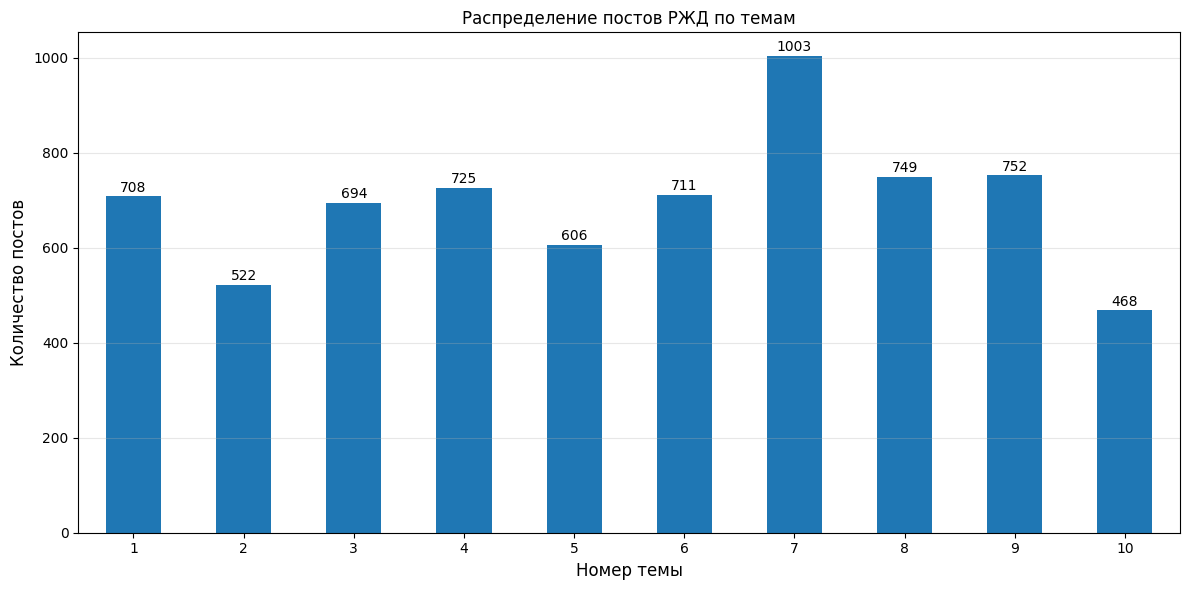

In [ ]:
# Распределение тем для каждого документа
doc_topic_distrib = lda.transform(dataset)  # shape: (n_documents, n_topics)

# Находим индекс темы с максимальной вероятностью для каждого документа
dominant_topics = doc_topic_distrib.argmax(axis=1)

# Добавляем доминирующую тему в датасет
prepr_df['dominant_topic'] = dominant_topics + 1

topic_counts = prepr_df['dominant_topic'].value_counts().sort_index()

# Визуализация распределения постов по темам
plt.figure(figsize=(12, 6))
topic_counts.plot(kind='bar')
plt.title('Распределение постов РЖД по темам')
plt.xlabel('Номер темы', fontsize=12)
plt.ylabel('Количество постов', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Добавляем значения на столбцы
for i, v in enumerate(topic_counts):
    plt.text(i, v + max(topic_counts)*0.01, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

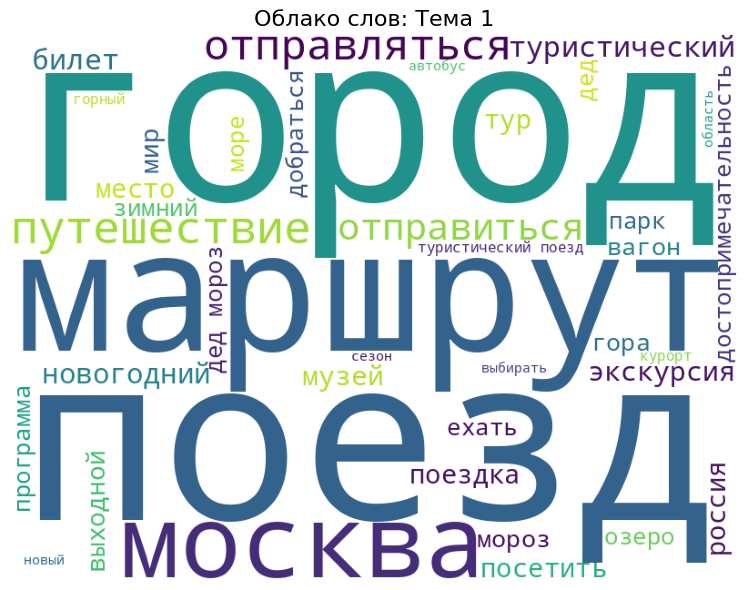

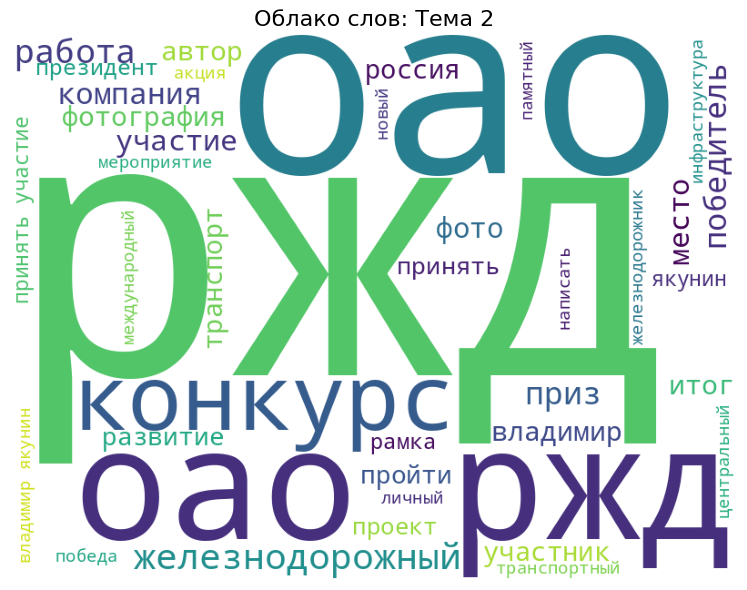

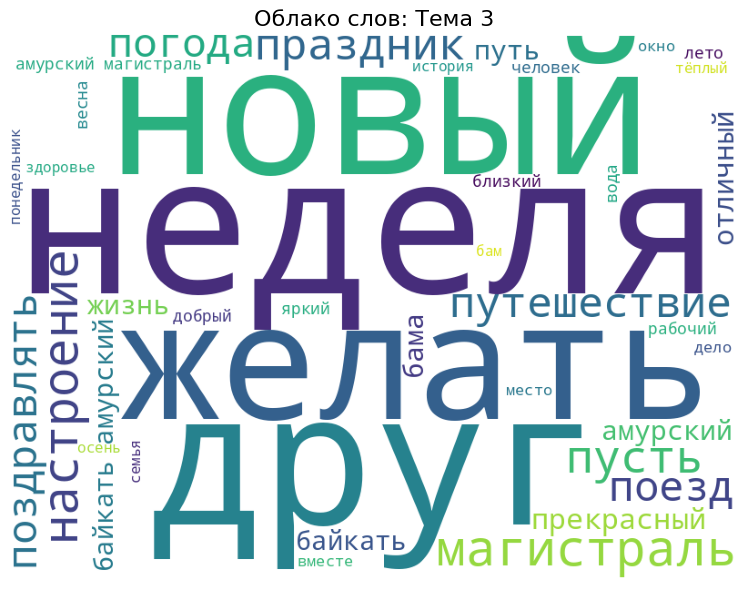

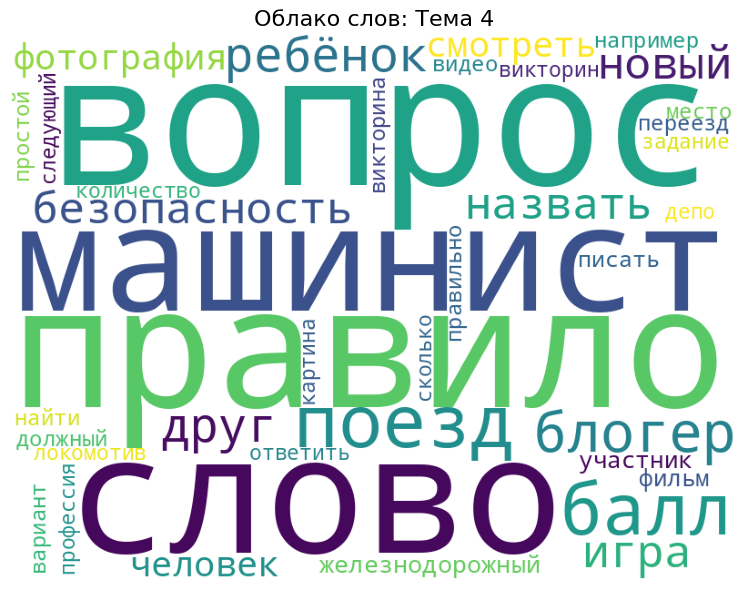

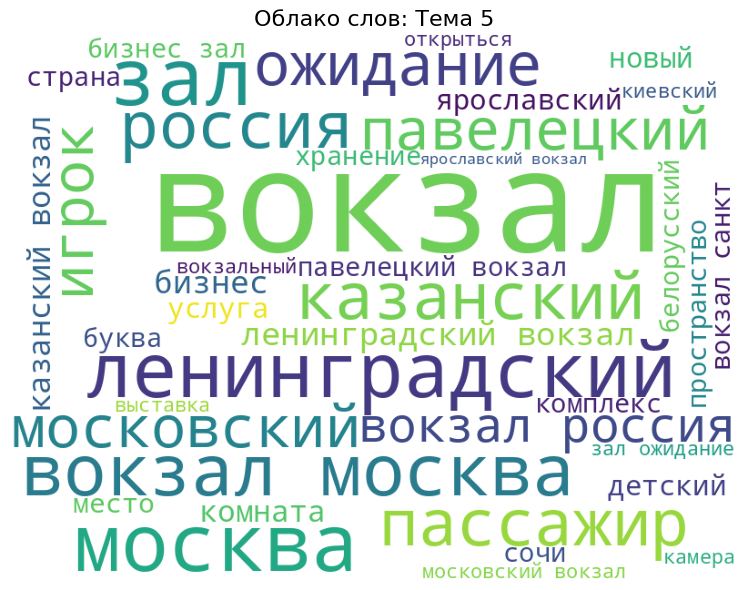

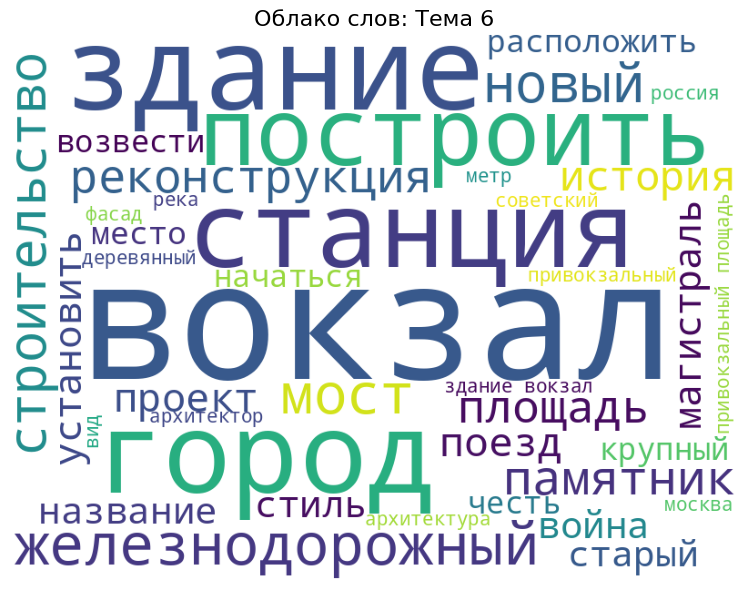

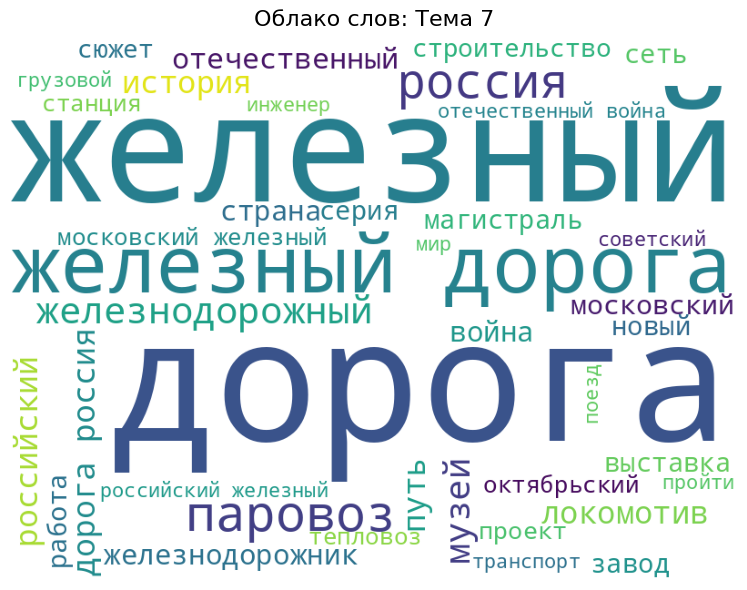

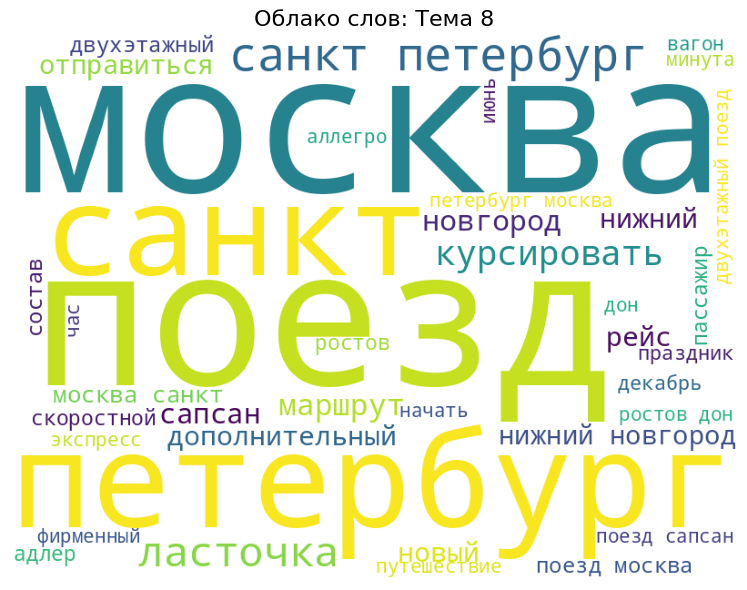

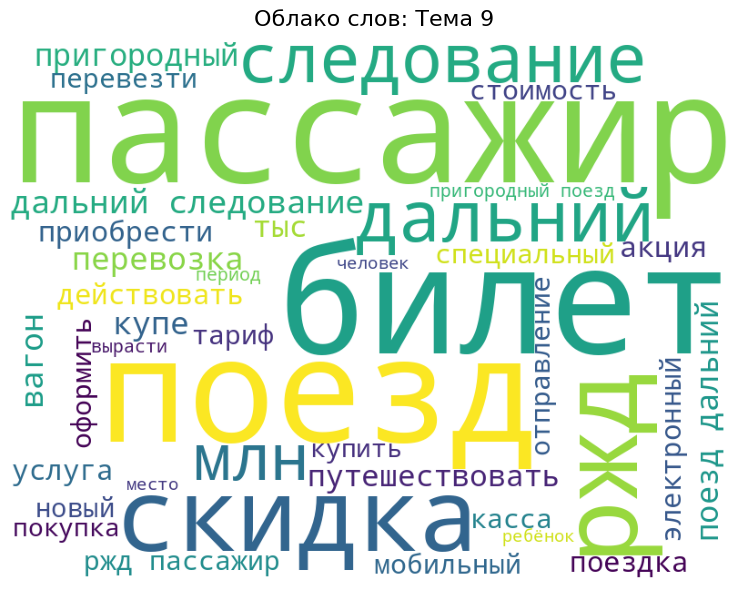

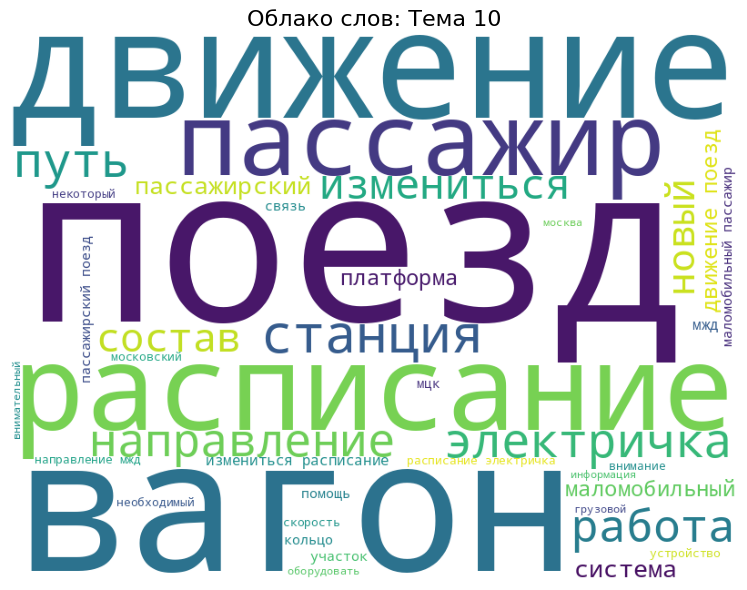

In [ ]:
words = count_vectorizer.get_feature_names_out()

# Создаем по одному облаку для каждой темы
for topic_num in range(lda.n_components):
    plt.figure(figsize=(8, 6))
    
    # Берем топ-50 слов для темы
    topic_weights = lda.components_[topic_num]
    top_indices = topic_weights.argsort()[-50:][::-1]
    
    # Создаем словарь
    word_freq = {words[i]: topic_weights[i] for i in top_indices}
    
    # Генерируем облако
    wordcloud = WordCloud(width=800, height=600, background_color='white', max_words=40).generate_from_frequencies(word_freq)
    
    plt.imshow(wordcloud)
    plt.title(f'Облако слов: Тема {topic_num + 1}', fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

### Рассмотрим также пример тематического моделирования с использованием LDA из библиотеки gensim.


In [ ]:
# Предобработка текста для тематического моделирования в gensim

# Создание словаря ключ:значение
gensim_dictionary = Dictionary(texts_as_lists) 

# Фильтрация слов: удаление очень редких (меньше 5 документов) и очень частых (встречаются более чем в 50% документов)
gensim_dictionary.filter_extremes(no_below=5, no_above=0.8)

# Создание корпуса (мешок слов)
corpus = [gensim_dictionary.doc2bow(text, allow_update=True) for text in texts_as_lists] # (word_id, частота в документе)

print(f"Создан словарь с {len(gensim_dictionary)} уникальными токенами.")
print(f"Создан корпус из {len(corpus)} документов.")

Создан словарь с 14640 уникальными токенами.
Создан корпус из 7296 документов.


In [ ]:
# Применение алгоритма LDA

num_topics = 10 # Выбрала 10 тем

print(f"\nОбучение модели LDA с {num_topics} темами...")

# Обучение LDA модели
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=gensim_dictionary, passes=40) # Увеличиваем passes для лучшей сходимости

print("Обучение LDA модели завершено.")

# Интерпретация тем
print("\nВыявленные темы:")
topics = lda_model.print_topics(num_words=10) # Выводим 10 наиболее значимых слов для каждой темы

for topic_id, topic_words in topics:
    print(f"Тема #{topic_id + 1}: {topic_words}")


Обучение модели LDA с 10 темами...
Обучение LDA модели завершено.

Выявленные темы:
Тема #1: 0.040*"дорога" + 0.036*"железный" + 0.015*"поезд" + 0.014*"железнодорожный" + 0.011*"паровоз" + 0.011*"россия" + 0.008*"строительство" + 0.008*"путь" + 0.008*"станция" + 0.007*"магистраль"
Тема #2: 0.010*"альбом" + 0.007*"дорогой" + 0.006*"ребёнок" + 0.006*"сортировочный" + 0.006*"друг" + 0.005*"точка" + 0.005*"здоровье" + 0.005*"жизнь" + 0.005*"должный" + 0.004*"курорт"
Тема #3: 0.019*"слово" + 0.014*"игрок" + 0.012*"игра" + 0.009*"машинист" + 0.009*"станция" + 0.008*"город" + 0.007*"буква" + 0.007*"амурский" + 0.006*"мир" + 0.006*"сюжет"
Тема #4: 0.011*"город" + 0.010*"оао" + 0.009*"ржд" + 0.009*"владимир" + 0.009*"станция" + 0.008*"якунин" + 0.007*"компания" + 0.006*"железнодорожник" + 0.006*"памятник" + 0.005*"человек"
Тема #5: 0.018*"вопрос" + 0.018*"фотография" + 0.017*"конкурс" + 0.016*"друг" + 0.015*"дорога" + 0.013*"место" + 0.011*"участник" + 0.010*"новый" + 0.010*"победитель" + 0.01

In [ ]:
# Оцениваем когерентность модели gensim
from gensim.models import CoherenceModel

# Рассчитываем когерентность
coherence_model = CoherenceModel(
    model=lda_model,
    texts=texts_as_lists,
    dictionary=gensim_dictionary,
    coherence='c_v' # тип метрики (лучший вариант)
)

coherence_score = coherence_model.get_coherence()
print(f"Когерентность модели: {coherence_score:.4f}")

Когерентность модели: 0.4827


In [ ]:
# tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# tf-idf векторизация
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95,
    min_df=5
)

# Преобразования текстов в tf-idf матрицу 
tfidf_data = tfidf_vectorizer.fit_transform(prepr_df['processed_text'])

n_topics = 10

nmf = NMF(
    n_components=n_topics,
    random_state=42
)

nmf.fit(tfidf_data)

feature_names = tfidf_vectorizer.get_feature_names_out()

# функция для вывода топ слов каждой темы
def display_nmf_topics(model, feature_names, n_top_words=15):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [
            feature_names[i]
            for i in topic.argsort()[-n_top_words:][::-1]
        ]
        print(f"Тема {topic_idx + 1}: {', '.join(top_words)}\n")

display_nmf_topics(nmf, feature_names)


Тема 1: вокзал, здание, город, построить, зал, станция, площадь, ленинградский, железнодорожный, россия, реконструкция, история, ожидание, памятник, павелецкий

Тема 2: петербург, санкт, москва, ласточка, курсировать, новгород, маршрут, нижний, сапсан, дополнительный, блогер, псков, начать, петрозаводск, май

Тема 3: дорога, железный, россия, музей, паровоз, железнодорожный, станция, московский, история, магистраль, сеть, строительство, российский, безопасность, путь

Тема 4: билет, скидка, купе, акция, приобрести, купить, действовать, продажа, верхний, отправление, оформить, ржд, тариф, покупка, ряд

Тема 5: расписание, измениться, электричка, направление, мжд, связь, внимательный, работа, ярославский, некоторый, белорусский, внимание, планировать, ремонтный, горьковский

Тема 6: поезд, вагон, новый, москва, двухэтажный, отправиться, путешествие, маршрут, состав, курсировать, путь, движение, декабрь, рейс, поездка

Тема 7: пассажир, млн, перевезти, вырасти, перевозка, тыс, путешествов

In [ ]:
# Реконструкционная ошибка
reconstruction_error = nmf.reconstruction_err_
print(f"Ошибка реконструкции: {reconstruction_error:.4f}")

Ошибка реконструкции: 80.4677


In [ ]:
def interpret_nmf_results(nmf_model, feature_names, n_words=10):
    """
    Более детальная интерпретация результатов NMF
    """
    print("Интерпретация результатов NMF:")
    
    for topic_idx, topic in enumerate(nmf_model.components_): # Матрица весов слова в теме
        # Получаем топ-слова и их веса
        top_indices = topic.argsort()[-n_words:][::-1]
        top_words = [feature_names[i] for i in top_indices]
        top_weights = [topic[i] for i in top_indices]
        
        print(f"\nТема {topic_idx + 1}:")
        
        # Выводим слова с весами
        for word, weight in zip(top_words, top_weights):
            stars = "*" * int(weight * 20)  # Визуализация веса
            print(f"   {word:15} {weight:.4f} {stars}")
        
        # Анализ темы
        print(f"\n   Анализ:")
        print(f"   Самые важные слова: {top_words[0]}, {top_words[1]}")
        print(f"   Разброс весов: от {min(top_weights):.4f} до {max(top_weights):.4f}")
        
        # Определяем чистоту темы
        if top_weights[0] > 2 * top_weights[1]:
            print(f"   Тема четкая: есть доминирующее слово")
        else:
            print(f"   Тема распределенная: несколько равнозначных слов")


interpret_nmf_results(nmf, feature_names)

Интерпретация результатов NMF:

Тема 1:
   вокзал          3.5466 **********************************************************************
   здание          0.7877 ***************
   город           0.7354 **************
   построить       0.4157 ********
   зал             0.4012 ********
   станция         0.3486 ******
   площадь         0.3360 ******
   ленинградский   0.3128 ******
   железнодорожный 0.3062 ******
   россия          0.2980 *****

   Анализ:
   Самые важные слова: вокзал, здание
   Разброс весов: от 0.2980 до 3.5466
   Тема четкая: есть доминирующее слово

Тема 2:
   петербург       1.3070 **************************
   санкт           1.2895 *************************
   москва          1.0400 ********************
   ласточка        0.9949 *******************
   курсировать     0.4903 *********
   новгород        0.4472 ********
   маршрут         0.3252 ******
   нижний          0.3199 ******
   сапсан          0.2862 *****
   дополнительный  0.2455 ****

   Анализ:

In [ ]:
# Получаем матрицу «пост × тема»
doc_topic_dist_nmf = nmf.transform(tfidf_data)
pd.DataFrame(doc_topic_dist_nmf).head(4)

0         1         2         3         4         5         6    7   \
0  0.000000  0.000000  0.109436  0.000000  0.000000  0.003060  0.000000  0.0   
1  0.018704  0.003030  0.000000  0.004034  0.003352  0.009226  0.000000  0.0   
2  0.000000  0.093075  0.000139  0.034698  0.000000  0.000782  0.027065  0.0   
3  0.001687  0.077255  0.000000  0.000420  0.000000  0.016385  0.018851  0.0   

         8        9         10        11        12        13        14  
0  0.000288  0.00000  0.001458  0.000911  0.000000  0.000000  0.000000  
1  0.019724  0.00275  0.002879  0.002048  0.055093  0.000000  0.001838  
2  0.000000  0.00000  0.000000  0.004487  0.072514  0.000000  0.000000  
3  0.000000  0.00000  0.017338  0.016125  0.002677  0.048307  0.000650

In [ ]:
# Получение вероятностей тем для каждого поста
import numpy as np

# Матрица: (кол-во постов × кол-во тем)
doc_topic_dist = lda.transform(dataset)

doc_topic_dist.shape

pd.DataFrame(doc_topic_dist).head(5)

0         1         2         3         4         5         6  \
0  0.153018  0.014286  0.014286  0.014286  0.014286  0.014288  0.732691   
1  0.422295  0.007145  0.306295  0.066939  0.161605  0.007144  0.007144   
2  0.261848  0.002381  0.002381  0.002381  0.031627  0.029667  0.002381   
3  0.002858  0.094428  0.062832  0.002858  0.002858  0.169378  0.002858   
4  0.016669  0.016667  0.016677  0.016670  0.016667  0.849979  0.016668   

          7         8         9  
0  0.014286  0.014286  0.014288  
1  0.007145  0.007144  0.007144  
2  0.050384  0.291079  0.325869  
3  0.443873  0.002859  0.215199  
4  0.016667  0.016667  0.016669

In [ ]:
# Сумма вероятностей по строке ≈ 1
row_sums = doc_topic_dist.sum(axis=1)

row_sums.min(), row_sums.max()

(np.float64(0.9999999999999996), np.float64(1.0000000000000004))

In [ ]:
max_topic_prob = pd.DataFrame(doc_topic_dist.max(axis=1))

max_topic_prob.describe()

0
count  6938.000000
mean      0.634932
std       0.180154
min       0.100000
25%       0.492330
50%       0.617980
75%       0.782909
max       0.985243

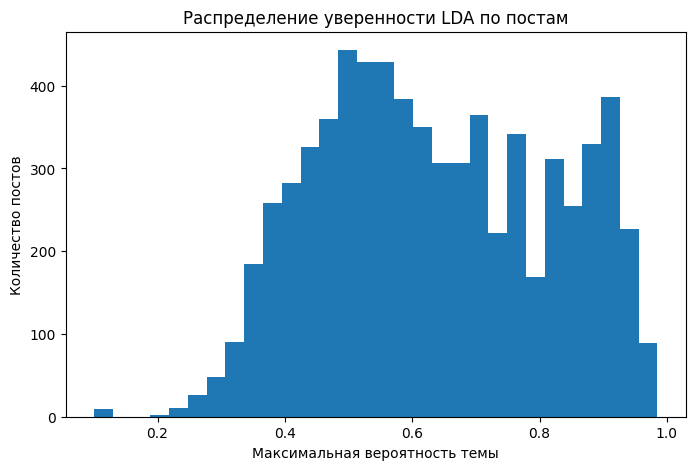

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(max_topic_prob, bins=30)
plt.xlabel('Максимальная вероятность темы')
plt.ylabel('Количество постов')
plt.title('Распределение уверенности LDA по постам')
plt.show()


In [ ]:
uniform_threshold = 1 / doc_topic_dist.shape[1] + 0.02

problem_docs = np.where(max_topic_prob < uniform_threshold)[0]

len(problem_docs)

9

In [ ]:
dominant_topic = np.argmax(doc_topic_dist, axis=1)
prepr_df['dominant_topic'] = dominant_topic

prepr_df

Text  goal  \
0     Где-то в Челябинской области — суровая красота...     1   
1     Отличный повод запланировать зимнее приключени...     1   
2     С 1 декабря у всех наших пассажиров появился н...     1   
3     Уже почти год между Москвой и Санкт-Петербурго...     1   
4     В Амурской области есть станция, которую уважи...     1   
...                                                 ...   ...   
7390  21 мая в Саратовском регионе Приволжской желез...     1   
7391  Старший вице-президент ОАО "РЖД" Валентин Гапа...     1   
7392  Глава ОАО «РЖД» Владимир Якунин говорит о том,...     1   
7393  Внимание пассажирам! Определен график движения...     1   
7394  Добро пожаловать на официальную страницу ОАО "...     1   

                                         processed_text  text_length  \
0     челябинский область суровый красота уральский ...            7   
1     отличный повод запланировать зимний приключени...           19   
2     декабрь пассажир новый повод нетерпение посадк...          100   
3     москва санкт петербург курсировать обновить дв...           50   
4     амурский область станция уважительно называть ...            7   
...                                                 ...          ...   
7390  май саратовский регион приволжский железный до...           15   
7391  старший вица президент оао ржд валентин гапано...           18   
7392  глава оао ржд владимир якунин говорить должный...           31   
7393  внимание пассажир определить график движение п...           13   
7394  добро пожаловать официальный страница оао ржд ...            9   

      dominant_topic  
0                  6  
1                  0  
2                  9  
3                  7  
4                  5  
...              ...  
7390               1  
7391               1  
7392               1  
7393               9  
7394               1  

[6938 rows x 5 columns]